In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

# Ice Cream Production Data

In [3]:
#read data
df_ice_cream = pd.read_csv('data/ice_cream.csv')

In [4]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [5]:
#rename columns to something more understandable
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [6]:
#convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [7]:
#set date as index
df_ice_cream.set_index('date', inplace=True)

In [8]:
#just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [9]:
#show result
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


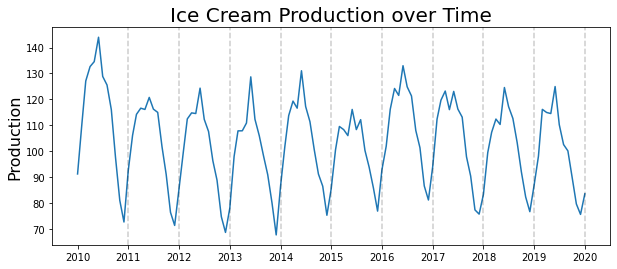

In [10]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# ACF

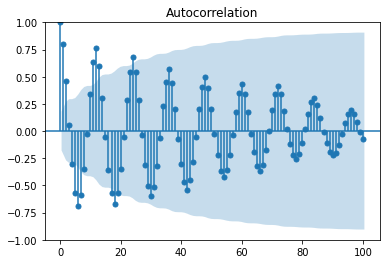

In [11]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

## Based on decaying ACF, we are likely dealing with an Auto Regressive process

# PACF

/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


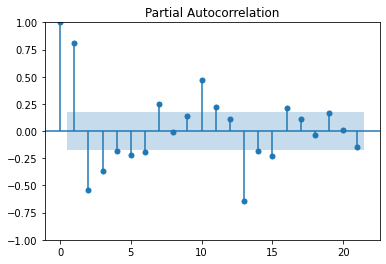

In [12]:
pacf_plot = plot_pacf(df_ice_cream.production)

## Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

# On stock data

In [14]:
import yfinance as yf

In [15]:
#define the ticker symbol
tickerSymbol = 'SPY'

In [16]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [17]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-1-1')

In [18]:
tickerDf = tickerDf[['Close']]

In [19]:
#see your data
tickerDf.head()

,Close
Date,
2015-01-02 00:00:00-05:00,178.278488
2015-01-05 00:00:00-05:00,175.058899
2015-01-06 00:00:00-05:00,173.410019
2015-01-07 00:00:00-05:00,175.570892
2015-01-08 00:00:00-05:00,178.686417


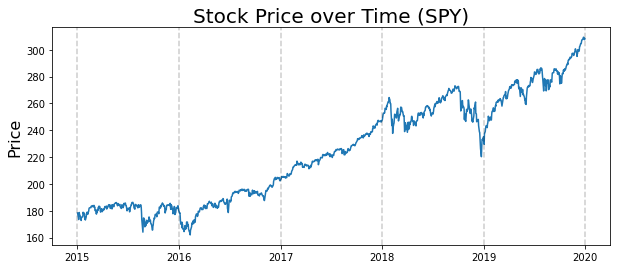

In [20]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Stationarity: take first difference of this series

In [21]:
# #take first difference
# first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
# first_diffs = np.concatenate([first_diffs, [0]])

In [30]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = tickerDf["Close"].diff(1)

In [32]:
tickerDf = tickerDf[1:]

In [33]:
tickerDf

,Close,FirstDifference
Date,,
2015-01-05 00:00:00-05:00,175.058899,-3.219589
2015-01-06 00:00:00-05:00,173.410019,-1.648880
2015-01-07 00:00:00-05:00,175.570892,2.160873
2015-01-08 00:00:00-05:00,178.686417,3.115524
2015-01-09 00:00:00-05:00,177.254517,-1.431900
...,...,...
2019-12-24 00:00:00-05:00,307.631104,0.009521
2019-12-26 00:00:00-05:00,309.268707,1.637604
2019-12-27 00:00:00-05:00,309.192108,-0.076599


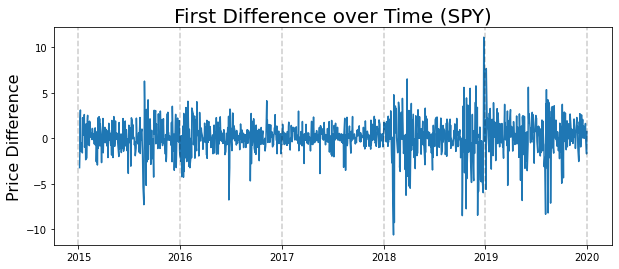

In [34]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# ACF

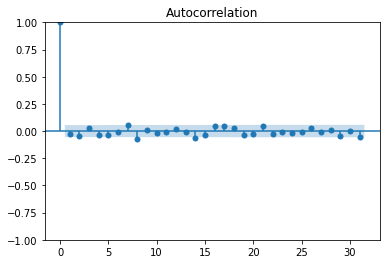

In [35]:
acf_plot = plot_acf(tickerDf.FirstDifference)

## ACF isn't that informative

# PACF

/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


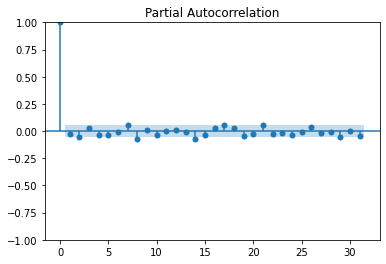

In [36]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)

## PACF also doesn't tell us much